In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -qq '/content/drive/MyDrive/galaxy_zoo/images_gz2.zip'

replace images/100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dir = pd.read_csv('/content/drive/MyDrive/galaxy_zoo/gz2_filename_mapping.csv')
quiz = pd.read_csv('/content/drive/MyDrive/galaxy_zoo/gz2_hart16.csv')

In [ ]:
dir1 = dir[(dir['sample'] == 'original')| (dir['sample'] == 'extra')]

In [ ]:
dir1

,objid,sample,asset_id
0,587722981736120347,original,1
1,587722981736579107,original,2
2,587722981741363294,original,3
3,587722981741363323,original,4
4,587722981741559888,original,5
...,...,...,...
273778,588848901532680337,extra,273779
273779,588848901533532179,extra,273780
273780,588848901533859955,extra,273781
273781,588848901534974162,extra,273782


In [ ]:
# 누락된 파일 목록을 저장할 리스트
missing_files = []

# 테이블 데이터를 반복 (예를 들어, dataframe이 있다고 가정)
for idx, row in dir1.iterrows():
    file_path = '/content/images/' + str(dir1.loc[idx, 'asset_id']) + '.jpg'
    if not os.path.exists(file_path):
        missing_files.append(idx)


# 누락된 파일 목록 출력
print('Missing files index :', missing_files)

Missing files index : [0, 1, 9, 61, 63, 66, 90, 103, 110, 112, 121, 158, 159, 165, 166, 168, 169, 232, 233, 247, 249, 261, 275, 296, 300, 307, 329, 345, 349, 350, 360, 373, 382, 385, 442, 448, 449, 454, 498, 500, 503, 504, 508, 513, 516, 518, 521, 529, 541, 543, 550, 551, 552, 559, 565, 588, 598, 601, 612, 614, 616, 651, 671, 676, 705, 715, 721, 723, 732, 765, 766, 785, 793, 797, 800, 821, 822, 829, 836, 869, 870, 908, 914, 917, 918, 924, 927, 939, 943, 946, 948, 968, 971, 985, 1023, 1047, 1059, 1085, 1098, 1104, 1151, 1152, 1153, 1154, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1171, 1172, 1173, 1174, 1176, 1178, 1191, 1192, 1193, 1200, 1211, 1223, 1225, 1229, 1241, 1242, 1268, 1273, 1278, 1280, 1284, 1286, 1296, 1300, 1303, 1307, 1330, 1349, 1365, 1375, 1450, 1451, 1456, 1462, 1471, 1472, 1477, 1498, 1508, 1522, 1547, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1578, 1603, 1609, 1628, 1637, 1643, 1644, 1660, 1661, 1

In [ ]:
dir2 = dir1.drop(index = missing_files)
dir = dir2.reset_index(drop=True)

In [ ]:
# choice_1_count = quiz.loc[:,['t01_smooth_or_features_a01_smooth_count', 't01_smooth_or_features_a02_features_or_disk_count', 't01_smooth_or_features_a03_star_or_artifact_count'] ]
# choice_1_weight = quiz.loc[:,['t01_smooth_or_features_a01_smooth_weight', 't01_smooth_or_features_a02_features_or_disk_weight', 't01_smooth_or_features_a03_star_or_artifact_weight'] ]
# choice_1_fraction = quiz.loc[:,['t01_smooth_or_features_a01_smooth_fraction', 't01_smooth_or_features_a02_features_or_disk_fraction', 't01_smooth_or_features_a03_star_or_artifact_fraction'] ]
# choice_1_weighted_fraction = quiz.loc[:,['t01_smooth_or_features_a01_smooth_weighted_fraction', 't01_smooth_or_features_a02_features_or_disk_weighted_fraction', 't01_smooth_or_features_a03_star_or_artifact_weighted_fraction'] ]

choice_1_debiased = quiz.loc[:,['t01_smooth_or_features_a01_smooth_debiased', 't01_smooth_or_features_a02_features_or_disk_debiased', 't01_smooth_or_features_a03_star_or_artifact_debiased'] ]
choice_1_flag = quiz.loc[:,['t01_smooth_or_features_a01_smooth_flag', 't01_smooth_or_features_a02_features_or_disk_flag', 't01_smooth_or_features_a03_star_or_artifact_flag'] ]


In [ ]:
# choice_1_count.head()
# choice_1_weight.head()
# choice_1_fraction.head()
# choice_1_weighted_fraction.head()
choice_1_debiased.head()
choice_1_flag.head()

,t01_smooth_or_features_a01_smooth_flag,t01_smooth_or_features_a02_features_or_disk_flag,t01_smooth_or_features_a03_star_or_artifact_flag
0,0,1,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,0,0


In [ ]:
# choice_1_count['target'] =np.argmax(np.array(choice_1_count), axis = 1)
# choice_1_weight['target'] =np.argmax(np.array(choice_1_weight), axis = 1)
# choice_1_fraction['target'] =np.argmax(np.array(choice_1_fraction), axis = 1)
# choice_1_weighted_fraction['target'] =np.argmax(np.array(choice_1_weighted_fraction), axis = 1)

# 시간 축을 위한 전처리
choice_1_debiased['target'] =np.argmax(np.array(choice_1_debiased), axis = 1)

# 필요한 이미지 label 값
choice_1_debiased['target'].value_counts()

1    141430
0     97670
2       595
Name: target, dtype: int64

In [ ]:
choice_1 = quiz.iloc[:,8:27]
# 일반적으로 데이터의 품질, 신뢰성 또는 특정 기준을 충족 여부

choice_1_flag['target'] =np.argmax(np.array(choice_1_flag), axis = 1)
choice_1_flag[choice_1_flag['target'] == 2] = 1
choice_1['True'] = np.argmax(np.array(choice_1_flag), axis = 1)

# 신뢰성 여부에 따라 사용가능한 이미지 제약
choice_1_flag['d_target'] =choice_1_debiased['target']
choice_1_flag.groupby(['target', 'd_target'])['d_target'].value_counts()

# label 1만 신뢰성 위주로 가지고 오고 나머지 0, 2은 신뢰성을 제외하고 가지고 온다.

target  d_target  d_target
0       0         0            97670
        1         1            38804
        2         2              595
1       1         1           102626
Name: d_target, dtype: int64

In [ ]:
# 신뢰성 있는 label: 1 값 추출

choice_1_True = choice_1[choice_1['True'] == 1]
quiz_data = quiz.iloc[choice_1_True.index,:]

quiz_label = choice_1_debiased.loc[choice_1_True.index, 'target']
quiz_data['label'] = quiz_label


# 랜덤으로 100 추출 -> 현시점 랜덤 시드 값 설정 안함

label_1_list = list(quiz_data.index)
random_indices = random.sample(label_1_list, 20000)

sample_1= quiz_data.loc[random_indices, ['dr7objid','label']]
dir['sample_1'] = dir['objid'].isin(sample_1['dr7objid'])
sam1_image = dir[dir['sample_1'] == 1]['asset_id'].reset_index(drop=True) # 이미지 이름



# 신뢰성 없는 label 0, 1, 2 값 추출
choice_1_False = choice_1[choice_1['True'] == 0]
quiz_data = quiz.iloc[choice_1_False.index,:]
quiz_label = choice_1_debiased.loc[choice_1_False.index, 'target']
quiz_data['label'] = quiz_label

label_0_list =  list(quiz_data[quiz_data.label == 0].index)
label_1_list_F = list(quiz_data[quiz_data.label == 1].index)
label_2_list = list(quiz_data[quiz_data.label == 2].index)

random_indices_0 = random.sample(label_0_list, 20000)
random_indices_1 = random.sample(label_1_list_F, 20000)
random_indices_2 = random.sample(label_2_list, 500)

sample_0= quiz_data.loc[random_indices_0, ['dr7objid','label']]
sample_1_F= quiz_data.loc[random_indices_1, ['dr7objid','label']]
sample_2= quiz_data.loc[random_indices_2, ['dr7objid','label']]

dir['sample_0'] = dir['objid'].isin(sample_0['dr7objid'])
dir['sample_1_F'] = dir['objid'].isin(sample_1_F['dr7objid'])
dir['sample_2'] = dir['objid'].isin(sample_2['dr7objid'])

sam0_image = dir[dir['sample_0'] == 1]['asset_id'].reset_index(drop=True)
sam1_F_image = dir[dir['sample_1_F'] == 1]['asset_id'].reset_index(drop=True)
sam2_image = dir[dir['sample_2'] == 1]['asset_id'].reset_index(drop=True)

<ipython-input-15-eaf022f81ec3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quiz_data['label'] = quiz_label
<ipython-input-15-eaf022f81ec3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quiz_data['label'] = quiz_label


In [ ]:
image = []

sam = [sam0_image,sam1_image,sam1_F_image,sam2_image]

for i in sam:
    image.extend(np.array(i))

In [ ]:
dir['sample'] = dir['asset_id'].isin(image)

dir_sample = dir[dir['sample']== 1]

dir_sample['sample_1_S'] = dir_sample.sample_1 +  dir_sample.sample_1_F
dir_sample =dir_sample.drop(columns = ['sample','sample_1','sample_1_F'])
# dir_sample = dir_sample.rename(columns={'sample_0': '0', 'sample_1_S': '1', 'sample_2': '2'})
# dir_sample.iloc[:,2:].idxmax(axis = 1)

# dir_sample = dir_sample.astype(int)


<ipython-input-17-bcc9b9d37321>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_sample['sample_1_S'] = dir_sample.sample_1 +  dir_sample.sample_1_F


In [ ]:
dir_sample = dir_sample.rename(columns={'sample_0': '0', 'sample_1_S': '1', 'sample_2': '2'})
dir_sample = dir_sample.astype(int)
dir_sample['label']  = dir_sample.iloc[:,2:].idxmax(axis = 1)
dir_sample =dir_sample.drop(columns = ['0','1','2'])
dir_sample = dir_sample.reset_index(drop=True)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.dir = '/content/images/'


    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dir+ str(self.dataframe.loc[idx, 'asset_id'])+'.jpg'
        label = self.dataframe.loc[idx, 'label']

        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label



In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = CustomDataset(dir_sample, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= 128, shuffle=True)

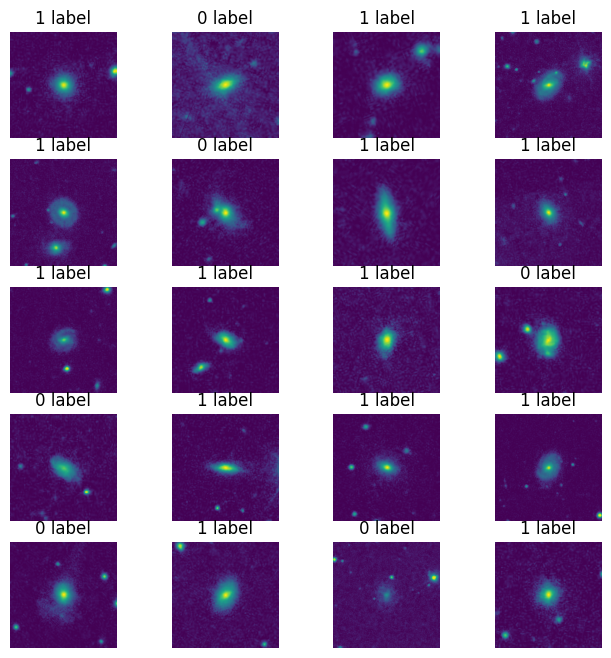

In [ ]:
import cv2

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;

num = random.sample(list(dir_sample['asset_id']), 20)

for i in range(1, columns*rows +1):

    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]

    fig.add_subplot(rows, columns, i)
    plt.title(f'{train_dataset[i][1]} label')
    plt.axis('off')
    plt.imshow(img, cmap = 'viridis')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import cv2 as cv
from google.colab.patches import cv2_imshow

check = pd.read_csv('/content/drive/MyDrive/galaxy_zoo/gz2_filename_mapping.csv')
check = check[(check['sample'] == 'original')| (check['sample'] == 'extra')]

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cuda


In [ ]:
learning_rate = 1e-3
training_epochs = 10

In [ ]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size = 3, stride = 1, padding = 1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride =2)
        )

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride =2)
        )

        self.fc = torch.nn.Linear(106*106*64, 3 , bias = True)

        torch.nn.init.xavier_uniform(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


In [ ]:
len(train_dataset)

58317

In [ ]:
model = CNN().to(device)

<ipython-input-41-35a1cfad7e67>:20: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc.weight)


In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 456


In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in train_loader:

        Y= torch.tensor(list(map(int, Y)))
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        break


    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))


[Epoch:    1] cost = 0.00244616834
[Epoch:    2] cost = 0.0240930803
[Epoch:    3] cost = 0.0131660271
[Epoch:    4] cost = 0.00147375988
[Epoch:    5] cost = 0.00750527298
[Epoch:    6] cost = 0.00301698758
[Epoch:    7] cost = 0.00257478259
[Epoch:    8] cost = 0.00432872027
[Epoch:    9] cost = 0.0050089485
[Epoch:   10] cost = 0.00262932084


In [ ]:
from tqdm import tqdm

for epoch in range(training_epochs):
    avg_cost = 0

    # Wrap train_loader with tqdm
    for X, Y in tqdm(train_loader, desc=f'Epoch {epoch+1}/{training_epochs}', position=0, leave=True):

        Y = torch.tensor(list(map(int, Y)))
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch


    print(f'[Epoch: {epoch + 1:>4}] cost = {avg_cost:.9}')

Epoch 1/10: 100%|██████████| 456/456 [04:35<00:00,  1.66it/s]


[Epoch:    1] cost = 0.595597804


Epoch 2/10: 100%|██████████| 456/456 [04:30<00:00,  1.69it/s]


[Epoch:    2] cost = 0.551251411


Epoch 3/10: 100%|██████████| 456/456 [04:33<00:00,  1.67it/s]


[Epoch:    3] cost = 0.532356262


Epoch 4/10: 100%|██████████| 456/456 [04:36<00:00,  1.65it/s]


[Epoch:    4] cost = 0.518502474


Epoch 5/10: 100%|██████████| 456/456 [04:38<00:00,  1.64it/s]


[Epoch:    5] cost = 0.507331908


Epoch 6/10: 100%|██████████| 456/456 [04:36<00:00,  1.65it/s]


[Epoch:    6] cost = 0.498280674


Epoch 7/10: 100%|██████████| 456/456 [04:37<00:00,  1.64it/s]


[Epoch:    7] cost = 0.482997656


Epoch 8/10:  67%|██████▋   | 307/456 [03:08<01:31,  1.63it/s]


OutOfMemoryError: ignored